#  EM Algorithm for matrice completion $\newline$

### 1- Standard EM algorithm application :

EM algorithm aims to compute the log-likelihood of a distribution in the presence of hidden random variables;
when observing { $ X^{1}, X^{2},.... X^{n} $ } which may be softly assigned to  k unknown (hidden) clusters {1....K} .   A multinomial distribution is defined over thoses clusters via n random variables : $ Z^{1},Z^{2},...,Z^{n} $ such that $ P(Z^{i}=j) = P_{j} $  : $Z^{i}$  is the cluster identity of the data point $X^{i}$. $~$ In this project we'll suppose that $X^{i}/(Z^{i}=j)$ follows a normal distribution with mean $\mu_{j}$ and variance $var_{j}$ with $ j \in [1...k] $.

log-likelihood = $\normalsize LL$ = log($ \prod_{i=1}^n P(X^{i}, \theta) $ ) such that $\theta$ is the set of all parameters of our model : $\theta = (MU, vars ,P)$ / $P = [P_{1}, P_{2} ,...P_{k} ]$  ;  $var= [var_{1}, var_{2} ,...var_{k} ]$  ; $MU = [\mu_{1}, \mu_{2} ,...\mu_{k} ]$   $\newline$ 
In this project we consider that the components of any $X^{i}$ is independant of any other component of the same vector, so the covariance matrix is diagonal with k non-zero elements $\newline$
 $\normalsize LL$ = $\sum_{i=1}^n$log$\normalsize[$$ \sum_{Z^{i}=1}^k P(X^{i},Z^{i} ,\theta)$$\normalsize]$  $\newline$

let's consider a distribution  $Q_{i}$ over all the possible values of $Z^{i}$ and parametrized by $\theta$ : $\newline $    $Q_{i}$ = $Q(Z^{i},\theta)$ ; so we can write : $\newline$

 $\normalsize LL$ = $\sum_{i=1}^n$ log$\large($ $\sum_{z^{i}=1}^k$ Q($Z^{i};\theta$) * $\normalsize \frac{P(X^{i},Z^{i} ,\theta)}{Q(Z^{i};\theta)} $ $\large)$

$~$ = $\sum_{i=1}^n$log$\normalsize($$\underset{\small Z^{i}\~~ Q}  E [$$P(X^{i},Z^{i} ,\theta)$$ $$\large ~ / $$ Q(Z^{i},\theta)]$$\normalsize)$ $\newline$

By Yensen inequality we can write : $\newline$  
$\normalsize LL $   $\large>=$   $\sum_{i=1}^n$ $\underset{Z^{i}\~Q }  E $ [log($P(X^{i},Z^{i},\theta)/Q(Z^{i},\theta$))] because log is a concave function$\newline\$

Evidence Lower Bound : ELBO($X^{i},\theta , Q^{i}$) = $\underset{Z^{i}\~Q }  E $ [log($P(X^{i},Z^{i},\theta)/Q(Z^{i},\theta$))] ; $Q^{i}$ is any distribution over the random variable $Z^{i}$  $\newline\$

Again using Yensen Inequality we have : log(E[Z]) = E(log(Z)) if Z is constant random variable   $\newline\$

$P(X^{i},Z^{i},\theta)/Q(Z^{i},\theta$) = constant means that : $P(X^{i},Z^{i},\theta$) = $\alpha *  Q(Z^{i},\theta$) ; $\alpha \in  $ $\large  R $  $\newline$

so :$\sum_{z^{i}=1}^k$$P(X^{i},Z^{i},\theta$) = $\sum_{z^{i}=1}^k$$\alpha *  Q(Z^{i},\theta$) = $\alpha$ because $Q(Z^{i})$ is a distribution . Then we can conclude that : $\newline$

Q($Z^{i},\theta$) = $\normalsize \frac{P(X^{i},Z^{i},\theta)} {\sum_{z^{i}=1}^kP(X^{i},Z^{i},\theta)}  = \frac{P(X^{i},Z^{i},\theta)} {P(X^{i},\theta)}  = P(Z^{i}/X^{i};\theta) $\newline\$

So the curve of the log-likelihood we want to maximize :LL($\theta$,X) = $\sum_{i=1}^n$ log$\large($ $\sum_{z^{i}=1}^k$ Q($Z^{i};\theta$) * $\normalsize \frac{P(X^{i},Z^{i} ,\theta)}{Q(Z^{i};\theta)} )/X = (X^{1},X^{2},...X^{n} ) $ touch the curve of the sum of the elbos : $\sum_{i=1}^n$ELBO($X^{i},\theta , Q^{i}$) when $Q(Z^{i},\theta) = P(Z^{i}/X^{i};\theta)$ for every i in [1....n]$\newline\$ 

Further more, we can maximize this function : $\sum_{i=1}^n$ELBO($X^{i},\theta , Q^{i}$) with respect to $\theta$ to  be more closer to LL curve (of course we have to keep the $Q^{i's}$ fixed ), we can then conclude the following steps : (EM algorithm) $\newline\$

1- Randomly initialize the parameters $\theta$ $\newline\$

2-Construct the ELBOs sum = $ \sum_{i=1}^n\sum_{Z^{i}=1}^k $ $Q(Z^{i},\theta)$*[log($P(X^{i},Z^{i},\theta)/Q(Z^{i},\theta$))]  by setting for each i in [1,....n] : Q($Z^{i},\theta) =P(Z^{i}/X^{i};\theta)$ ; so $ \sum_{i=1}^n ELBO(X{i},\theta) =LL(X,\theta)$ ---this is the M-Step $\newline\$

3- Maximize  $ \sum_{i=1}^n ELBO(X^{i},\theta)$ with respect to $\theta$, so that we can find a better $\theta$ that make us closer to LL $\newline\$

$\Theta_{new} = \underset{\theta}{argmax} \sum_{i=1}^n ELBO(X{i},\theta)$ $\newline\$

After that, we can again construct a new set of $Q^{i}$ using $\Theta_{new}$  , calculate the ELBOS ( step 2) and then maximize it (step 3) to find another new $\theta$  $\newline\$

repeat this process untill $\sum_{i=1}^n ELBO(X{i},\theta)$ do not change significantly : the resulting $\theta$ are the final parameters to consider.




In [8]:
import numpy as np
from typing import NamedTuple

In [9]:
class GaussianMixture(NamedTuple):
    
    mu: np.ndarray  # (K, d) array - mean
    var: np.ndarray  # (K, ) array - variance
    p: np.ndarray  # (K, ) array -multinomial


The following function initialize our gaussian mixture with a K random mean vectors(choosen from the data points X)and uniform  assignement to the clusters, then compute the variances : $\newline$
we can use different seed in order to choose the best local maxima of the log-likelihood function

In [11]:
def initialization(X: np.ndarray, K: int,
         seed: int = 0): 


    np.random.seed(seed) # makes the random numbers predictable
    n, _ = X.shape
    p = np.ones(K) / K

    # select K random points as initial means
    mu = X[np.random.choice(n, K, replace=False)]
    var = np.zeros(K)
    # Compute variance
    for j in range(K):
        var[j] = ((X - mu[j])**2).mean()

    mixture = GaussianMixture(mu, var, p)
    Ass = np.ones((n, K)) / K

    return mixture, Ass
#Ass is the (n,k) matrix of points assignement to clusters : Ass[i,j] = P(Zi =j/Xi)  1<=i<= n and 1<=j<= k

Computing $Q^{i's}$ for the E-step :    $\newline\$

for i $ \in [1,...,n] : Q(Z^{i},\theta)$ = $P(Z^{i}=j/X^{i}; \theta) $  =   $\frac {P(X^{i}/Z^{i}=j; \theta)*P(Z^{i}=j)}{\sum_{j=1}^kP(X^{i}/Z^{i}; \theta)*P(Z^{i}=j)}   $
 
 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$    = $\frac  {P_{j}*N(X^{i},\mu ^{j},var^{j})}{\sum_{j=1}^k P_{j}*N(X^{i},\mu ^{j},var^{j})} $  $\newline\$ 
 
with $ N(X^{i},\mu ^{j},var^{j}) $ is the normal distribution of mean = $\mu^{j}~and ~variance~~var^{j}~on~the~point X^{i}$ $\newline$
the python function bellow is a vectorized version of this formula:

In [12]:
def estep(X: np.ndarray, mixture: GaussianMixture) :

    
    # mu is a (K, d) array
    # var and p are both (K, ) array
    
    mu,var,p = mixture
    
    n,d = X.shape
    X = X.reshape(n,-1,d) #add axis 1 to allow broadcasting within a tensor. (n,k,d) is the resulting shape
    C = X-mu # is a tensor where each C[:,j,:] is X-mu[j]
    C = np.linalg.norm(C,axis = 2) # C shape is (n,k)
    ## construncting the gaussian
    gaussian_matrix = np.exp((C**2)/(-2 * var )) / np.sqrt((2*(np.pi)*var)**d)
    C = gaussian_matrix * p
    v = np.sum(C,axis=1)#C.sum(axis=1)
    Ass = C/v[:,None]  # each element of a row of C should be divided by the sum of this row
    # without [:,None] you will divide each column by the sum of each row
    ll = np.sum(np.log(v),axis=0)
    return Ass ,ll


For m-step we need to compute partial derivatives of $\sum_{i=1}^n ELBO(X{i},\theta)$ with respect to  $P = (P_{1},P_{2},...,P_{k})~ such ~that ~ P_{j} = P(Z^{i}=j)  ; (\mu_{1},\mu_{2},...,\mu_{k}) ~~and ~~(var_{1},var_{2},...,var_{k}) $  $\newline$
During the derivation P(j/i) is held fixed because of ELbo construction

the formulas after calculation are: $\newline$

$ P_{j} = \frac  {\sum_{i=1}^nP(Z^{i}=j/X^{i})} {n}$  $\newline$

$ \mu_{j}  = \frac {\sum_{i=1}^nP(Z^{i}=j/X^{i})*X^{i}} {\sum_{i=1}^nP(Z^{i}=j/X^{i})}  $ $\newline$

$ var_{j} =   \frac {\sum_{i=1}^nP(Z^{i}=j/X^{i})*||X^{i}- \mu_{j}||^{2}} {d*\sum_{i=1}^nP(Z^{i}=j/X^{i})} $ // d = dim($X^{i}$)
$\newline$
the python function bellow is a vectorized version of the 3 formulas:

In [13]:
def mstep(X: np.ndarray, Ass: np.ndarray):

    n,d = X.shape   
    Z = Ass.T @ X
    Z1 = np.sum(Ass,axis=0)
    mu = Z/Z1[:,None]
    p = Z1/n
    X = X.reshape(n,-1,d)
    C = np.linalg.norm(X-mu,axis = 2)
    C = C**2
    var = np.diag(C.T @ Ass)/(d*Z1)
    mixture = GaussianMixture(mu , var , p)
    return mixture
        

In [14]:
# Numerical example to check estep

x = np.array([
 [0.58337919, 0.32300269, 0.80771914],
 [0.69233561, 0.21568156, 0.04719336],
 [0.40171491, 0.22577008, 0.40878946],
 [0.74771469, 0.18215806, 0.54437665],
 [0.91478514, 0.4835627 , 0.8883807 ],
 [0.4945573 , 0.97120346, 0.83038243],
 [0.71148002, 0.37769013, 0.94948715],
 [0.33636665, 0.27072265, 0.80332786],
 [0.21609379, 0.13928103, 0.83893329],
 [0.99589302, 0.61479418, 0.36475476],
 [0.52732295, 0.69690508, 0.34824528],
 [0.13119949, 0.8889386 , 0.90165029]])
mu = np.array([[ 0.5043648 , -0.5896485  ,-0.87520286],
 [-0.92167245 ,-0.14912348 , 0.52909957],
 [-0.91550524  ,0.44972733 , 0.06643086],
 [-0.7268028 , -0.52167908 , 0.2505291 ],
 [ 0.64757943, -0.40344279 ,-0.06572373],
 [ 0.51084786, -0.09436803 , 0.53159298],
 [-0.30480639,  0.73680852,  0.136559  ]])
var = np.array( [1.14400138 ,0.90980189 ,0.87307393 ,0.96167367, 0.46503381 ,0.18077807,
 0.41259524])
p = np.array( [0.15850468, 0.15018115 ,0.15475043, 0.09552389, 0.14117689 ,0.17604874,
 0.12381422])

mixture = mu, var, p
estep(x,mixture)

(array([[0.01789272, 0.02903888, 0.02604764, 0.01674608, 0.07605231,
         0.77611029, 0.05811208],
        [0.04745882, 0.02423659, 0.02996359, 0.01879037, 0.20791305,
         0.60014125, 0.07149634],
        [0.02137237, 0.02765565, 0.02907252, 0.01757063, 0.09747517,
         0.72942288, 0.07743078],
        [0.02024418, 0.0176813 , 0.01644877, 0.01213384, 0.10247956,
         0.79651896, 0.03449337],
        [0.03224371, 0.03498645, 0.03262521, 0.02060816, 0.11474777,
         0.70278193, 0.06200677],
        [0.04130069, 0.09045439, 0.12272406, 0.04052795, 0.07914961,
         0.25507541, 0.37076788],
        [0.02178255, 0.03440591, 0.0293696 , 0.01945172, 0.08392652,
         0.75435141, 0.05671229],
        [0.01684512, 0.03936976, 0.03467176, 0.02159176, 0.06810038,
         0.7400723 , 0.07934892],
        [0.01681193, 0.04720952, 0.03756155, 0.02603547, 0.0675265 ,
         0.73128486, 0.07357018],
        [0.06112067, 0.03174565, 0.0423952 , 0.02126774, 0.20326385,
    

In [15]:
# Numerical example to check mstep

X=np.array([[0.46478451 ,0.2873986  ,0.84661982 ,0.14315285],
 [0.7483525  ,0.34169258 ,0.01317547 ,0.44437966],
 [0.2448775  ,0.36767494 ,0.50828033 ,0.02464073],
 [0.76525813 ,0.65054805 ,0.25078661 ,0.80245205],
 [0.50854932 ,0.34749935 ,0.12007976 ,0.57703126],
 [0.22604991 ,0.87549364 ,0.08124455 ,0.27195786],
 [0.03503111 ,0.16217596 ,0.62878189 ,0.30969803],
 [0.20575509 ,0.3071121  ,0.71348271 ,0.17587538],
 [0.61477009 ,0.43231088 ,0.41275813 ,0.07972753],
 [0.54651753 ,0.37062051 ,0.89087912 ,0.09313901],
 ])

Ass = np.array([[0.02452205, 0.21085182, 0.07636763, 0.20742055, 0.1161195 , 0.13387521
 , 0.23084324],
 [0.04915598, 0.02897232, 0.2714813 , 0.0851261 , 0.06515867, 0.32566207
 , 0.17444355],
 [0.16580115, 0.2520401 , 0.15002848, 0.05722725, 0.10537023, 0.09530797
 , 0.1742248 ],
 [0.09437172, 0.17002497, 0.21089314, 0.13783909, 0.14329337, 0.21334064
 , 0.03023706],
 [0.16654056, 0.11261767, 0.19194007, 0.12043036, 0.08696617, 0.25078473
 , 0.07072042],
 [0.15985971, 0.19063009, 0.14286293, 0.18977747, 0.10694067, 0.03495717
 , 0.17497196],
 [0.16221466, 0.03156289, 0.22685575, 0.22931145, 0.11309713, 0.08152603
 , 0.15543209],
 [0.29035139, 0.19447806, 0.03241045, 0.30916414, 0.09590959, 0.07370792
 , 0.00397845],
 [0.02745414, 0.06450474, 0.05786587, 0.12756706, 0.20161933, 0.34467446
 , 0.1763144 ],
 [0.19210235, 0.00653145, 0.08741341, 0.24043352, 0.16145091, 0.2454687
 , 0.06659967]])

Mu= [[0.36826528 ,0.47765323, 0.51613767, 0.29154174],
 [0.40651251, 0.4845498,  0.47837058, 0.30577948],
 [0.44474488, 0.5080388,  0.37548833, 0.3640105 ],
 [0.41081289, 0.41501087, 0.5482671,  0.2925194 ],
 [0.45672278, 0.45943413, 0.47976734, 0.28909272],
 [0.53545761, 0.48735205, 0.44996271, 0.30839815],
 [0.43341401,0.41552914, 0.48722304, 0.27103112]]
Var= [0.05239623 ,0.05213515 ,0.06342874 ,0.05337736, 0.05774436 ,0.05653801,
 0.04764514]
P=[0.14231527 ,0.13256754, 0.15522519 ,0.15967541 ,0.11380856 ,0.17013201,
 0.12627602]

mstep(X,Ass)


GaussianMixture(mu=array([[0.3520954 , 0.40722099, 0.49082719, 0.27479308],
       [0.39313721, 0.45551581, 0.45134761, 0.27908368],
       [0.45897638, 0.41640293, 0.34497052, 0.37484602],
       [0.39031987, 0.40122398, 0.52918297, 0.26908462],
       [0.45360099, 0.42330433, 0.48028824, 0.27211737],
       [0.55134695, 0.39858463, 0.39867289, 0.32245698],
       [0.4215507 , 0.40927815, 0.43669458, 0.23582422]]), var=array([0.056546  , 0.05831623, 0.0644084 , 0.05802708, 0.05820627,
       0.05450318, 0.05640086]), p=array([0.13323737, 0.12622141, 0.1448119 , 0.1704297 , 0.11959256,
       0.17993049, 0.12577656]))

The function bellow loop over E-step and M-step and compute the loglikelihood at every step until there is no significant change between 2 successive values of the loglikelihood (of the Elbos)

In [16]:
def run(X: np.ndarray, mixture: GaussianMixture,
        Ass: np.ndarray) :

    old_log_lh = "A"
    new_log_lh = "A"  
    
    # Start the main loop
    while old_log_lh == "A" or (new_log_lh - old_log_lh > 1e-7*np.abs(new_log_lh)):
        
        old_log_lh = new_log_lh
        
        # E-step
        Ass, new_log_lh = estep(X, mixture)
        
        # M-step
        mixture = mstep(X, Ass)
            
    return mixture,Ass,new_log_lh

In [17]:
X = np.loadtxt("d:\\talibit\\ds3.txt")

Plotting the clusters centers 

In [20]:
def plot(X: np.ndarray, mixture: GaussianMixture, Ass: np.ndarray,
         title: str):
    
    _, K = Ass.shape

    percent = Ass / Ass.sum(axis=1).reshape(-1, 1)
    fig, ax = plt.subplots()
    ax.title.set_text(title)
    ax.set_xlim((-20, 20))
    ax.set_ylim((-20, 20))
    r = 0.25
    color = ["k", "r", "g", "y", "m", "b"]
    for i, point in enumerate(X):
        theta = 0
        for j in range(K):
            offset = percent[i, j] * 360
            arc = Arc(point,
                      r,
                      r,
                      theta1=theta,
                      theta2=theta + offset,
                      angle=0,
                      edgecolor=color[j])
            ax.add_patch(arc)
            theta += offset
    plt.axis('equal')
    plt.show()


In the following block we try different initialization(different seeds ) for each K and pick the best Elbo

the best log-likelihood for k = 1 is of seed : 0 ;ll= -2509.595080142914


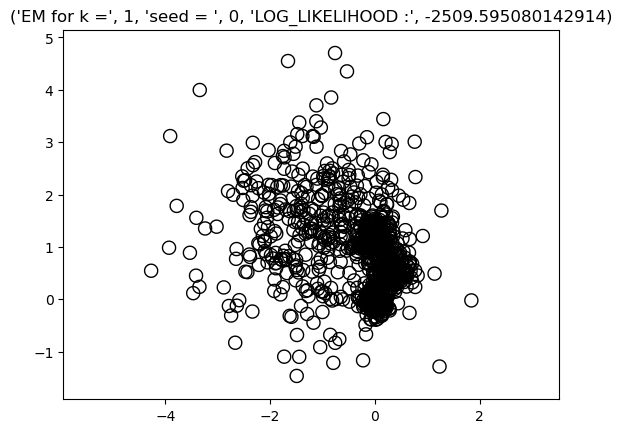

the best log-likelihood for k = 2 is of seed : 2 ;ll= -2150.971896650656


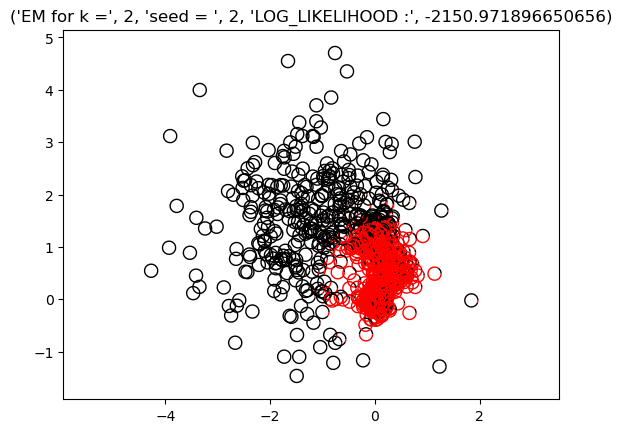

the best log-likelihood for k = 3 is of seed : 4 ;ll= -1945.3345881348305


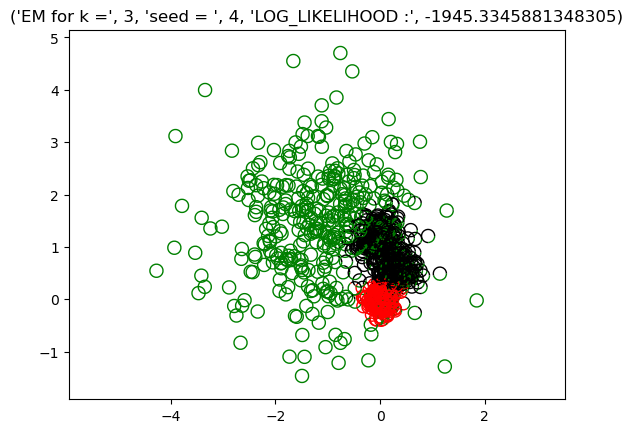

the best log-likelihood for k = 4 is of seed : 3 ;ll= -1781.3070416104758


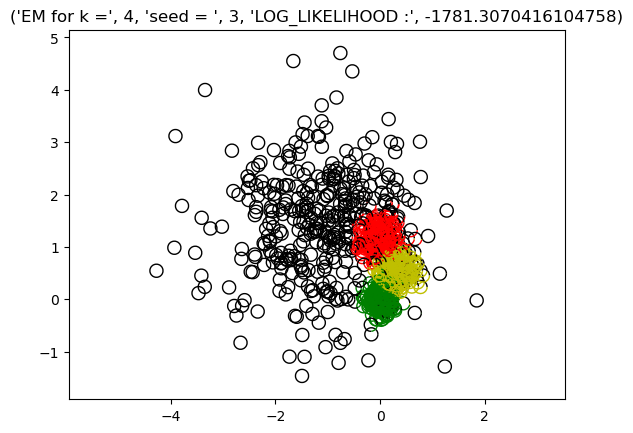

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
for k in [1,2,3,4] :
    LOG_LIKELIHOOD =[]
    MIXTURE = []
    ASS = []
    for seed in [0,1,2,3,4]:
        mixture,Ass = initialization(X,k, seed)
        mixture,Ass,new_log_lh = run(X, mixture,Ass)
        LOG_LIKELIHOOD.append(new_log_lh)
        MIXTURE.append(mixture)
        ASS.append(Ass)
    c = np.argmax(LOG_LIKELIHOOD)   
    print("the best log-likelihood for k =", k,"is of seed :",c,";ll=",LOG_LIKELIHOOD[c])    
    title = "EM for k =", k,'seed = ',c , "LOG_LIKELIHOOD :",LOG_LIKELIHOOD[c]

    plot(X, MIXTURE[c], ASS[c],title )


### 2-  EM application for incomplete matrices :

In this part we suppose that within each $X^{i}$ of the data matrix there is some unobserved(unknown) components that we want to approximate. we replace thoses missing components in the data matrix by 0.

For each $X^{i} / ~~i\in   [1,...n]$ we construct a corresponding vector $X^{i}_{i.nonzero}$ = $X^{i}$ without its zero components $\newline\$

Example : if  $X^{i}  = [1,3,0,4,0,5]~~ and~~ \mu^{j} = [10,0,0,1,3,5] ~~then~~   X^{i}_{i.nonzero} = [1,3,4,5] ~~  and ~~ \mu^{j}_{i.nonzero} =   [10,0,1,5]$

In this case LL = LL(obseved data) $\newline\$

$~~~~~~~~~~~~~~~~~~~~$$~>= \sum_{i=1}^n$ELBO($X^{i}_{i.nonzero},\theta , Q^{i}$) = $ \sum_{i=1}^n\sum_{Z^{i}=1}^k $ $P(Z^{i}/X^{i}_{i.nonzero};\theta)$*[log($P(X^{i}_{i.nonzero},Z^{i},\theta)/P(Z^{i}/X^{i}_{i.nonzero};\theta$))]  $\newline\$

For the E-step we compute the soft assignement matrix $\large ($ $P(Z^{i}=j/X^{i}_{i.nonzero})$ $\large )_{i,j}$ $1<=i<=n~~ and ~~1<=j<=k $ $\newline$

for i $ \in [1,...,n] : P(Z^{i}=j/X^{i}_{i.nonzero}; \theta) $  =   $\frac {P(X^{i}_{i.nonzero}/Z^{i}=j; \theta)*P(Z^{i}=j)}{\sum_{j=1}^kP(X^{i}_{i.nonzero}/Z^{i}; \theta)*P(Z^{i}=j)}   $
 
 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$    = $\frac  {P_{j}*N(X^{i}_{nonzero},\mu ^{j}_{i.nonzero},var^{j})}{\sum_{j=1}^k P_{j}*N(X^{i}_{i.nonzero},\mu ^{j}_{i.nonzero},var^{j})} $  $\newline\$ 
 
with $ N(X^{i}_{i.nonzero},\mu ^{j}_{i.nonzero},var^{j}) $ is the normal distribution of mean = $\mu^{j}_{i.nonzero}~and ~variance~~var^{j}~on~the~point X^{i}_{i.nonzero}$ $\newline$
the python function bellow is an implementation of this formula :


In [28]:
def estep1(X: np.ndarray, mixture: GaussianMixture):
        
    mu,var,p = mixture    
    
    #S = np.argwhere(X !=0)  # storing indices of non zero components of each vector in the data matrice
    # to extract non zero indices of X(i) :  S[S[:,0]==i][:,1] 
    ll=0
    n,d = X.shape
    k = len(p)
    #X = X.reshape(n,-1,d)
    #C = X-mu # is a tensor where each C[:,j,:] is X-mu[j]

    Ass = np.zeros((X.shape[0],mu.shape[0]))
    #for i in X :
        # NONZERO.append(np.nonzero(i))  
    for i in range(n):
        s = X[i][np.nonzero(X[i])].shape[0]
        #NONZERO.append(np.nonzero(X[i])) # building a list of n tuples where a tuple i hold non zero indices of X[i]
        C = (X[i][np.nonzero(X[i])] - mu[:,np.nonzero(X[i])][:,0,:]) # this the matrix [ X[i]nonzero indice - MU1(nonzero indice) ,.....,X[i]nonzero indice - MUk(nonzero indice)
        C = (np.linalg.norm(C,axis = 1))**2
        C = np.log(p) -0.5 * (C/var) - (s/2)*np.log(2*np.pi*var) # this log(P[i,:])
        maxi = np.max(C)
        #C1 = np.log((np.exp(C)).sum())
        C1 = maxi + np.log(np.exp(C-maxi).sum())
        C2 = C-C1
        Ass[i,:] = C2
        ll += ((C-Ass[i,:])*np.exp(Ass[i,:])).sum()
    return np.exp(Ass),ll

In [25]:
#Numerical example to apply estep1
X = np.array([[0.08139866 ,0.73698929],
 [0.57220251 ,0.91307095],
 [0.97428837 ,0.121657  ],
 [0.         ,0.        ],
 [0.68086352 ,0.        ],
 [0.90503647 ,0.77767875],
 [0.15609676 ,0.42533012],
 [0.91516578 ,0.13374693],
 [0.82452025 ,0.18086814],
 [0.74397611 ,0.2173376 ],
 [0.         ,0.        ],
 [0.         ,0.87016891],
 [0.27768733 ,0.99123815],
 [0.31179198 ,0.50484319],
 [0.85995317 ,0.04402752],
 [0.44978141 ,0.31422197]])

mu = np.array([[-0.46451005 ,-0.3420675 ],
 [-0.41562486  ,0.4767576 ],
 [-0.90516052, -0.06507598],
 [-0.28200743 ,-0.36927554],
 [ 0.05413437 ,-0.32927542],
 [ 0.68304696 ,-0.3739823 ],
 [-0.72907829 ,-0.31368254],
 [-0.4800053   ,0.40535978]])
var = np.array([0.84180324 ,0.53285674 ,1.19283075 ,0.70552459 ,0.47479999 ,0.43500445,
 1.10753075 ,0.58919782])
p = np.array([0.10676128 ,0.13101813 ,0.13403657 ,0.14303449 ,0.11107591 ,0.0992033
 ,0.14575431 ,0.12911601])

mixture = GaussianMixture(mu,var,p)
estep1(X,mixture)

(array([[0.07710843, 0.26520457, 0.08269477, 0.11239294, 0.10231314,
         0.05276457, 0.08613217, 0.22138941],
        [0.07627558, 0.23893965, 0.08748667, 0.10940303, 0.10075895,
         0.09722954, 0.09015754, 0.19974903],
        [0.07263646, 0.07934105, 0.056064  , 0.12428228, 0.17231049,
         0.34712613, 0.07255381, 0.07568578],
        [0.10676128, 0.13101813, 0.13403657, 0.14303449, 0.11107591,
         0.0992033 , 0.14575431, 0.12911601],
        [0.08757646, 0.09529297, 0.07014441, 0.14481691, 0.17486757,
         0.24675263, 0.09261155, 0.08793749],
        [0.07829117, 0.17411226, 0.08367664, 0.11644782, 0.11894504,
         0.18583619, 0.09119256, 0.15149831],
        [0.08247357, 0.20932132, 0.07348634, 0.13118829, 0.14733365,
         0.09222847, 0.08374077, 0.18022759],
        [0.07359523, 0.08592687, 0.05666259, 0.12618178, 0.17581707,
         0.32773173, 0.07294798, 0.08113675],
        [0.07518513, 0.10008933, 0.05849015, 0.12853306, 0.17813223,
         0.



we update only the component s of $\mu_{j} $  if  $ \sum_{i=1}^n p(Z^i = j/X_i)* 1_{S_{component} !=0}$  >= 1
because for any cluster where the m component of most data points are missing can give a very small number leading to issues in computation , and the previous values of MU are keept if not

For mstep in this case, we observe only the non zero components of each data point of the data matrix

for example in the matrix X below we observe $X^{1}= X^{1}_{1.nonzero}= [1,3,4]  , X^{2}_{2.nonzero} = [1,22]~~and ~~X^{3}_{3.nonzero} = [8]$

\begin{align*}
X &=
\begin{bmatrix}
1 & 3 & 4 \\
1 & 0 & 22\\
0 & 8 & 0
\end{bmatrix}
\end{align*}

so : 

LL = LL(observed data) $\large >=$ $\sum ELBOs$  $\newline$


$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$= $ \large \sum_{i=1}^n\sum_{Z^{i}=1}^k $ $P(Z^{i}/X^{i};\theta)$* [log($P(X^{i},Z^{i},\theta)/P(Z^{i}/X^{i};\theta$))]  $\newline\$

$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~=~~\sum_{i=1}^n\sum_{j=1}^k  P(Z^{i}=j/X^{i};\theta) * log ( \frac {P(X^{i},Z^{i},\theta)}{P(Z^{i}=j/X^{i};\theta)})    $ $\newline\$

$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~=~~\sum_{i=1}^n\sum_{j=1}^k  P(Z^{i}=j/X^{i};\theta) * log ( \frac {P(X^{i}/Z^{i},\theta) * P(Z^{i}=j)}{P(Z^{i}=j/X^{i};\theta)}) $ $\newline\$

$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~=~~\sum_{i=1}^n\sum_{j=1}^k  P(Z^{i}=j/X^{i};\theta) * log ( \frac {P(X^{i}/Z^{i},\theta) * P_{j}}{P(Z^{i}=j/X^{i};\theta)})  $ $\newline\$

$P(Z^{i}=j/X^{i};\theta)$ is the (i,j) element of the assignement matrix  ASS ; $ P(X^{i}/Z^{i},\theta)$ is the normal distribution on the point $X^{i}$ with mean $\mu^{j}$ and variance $var^{j} $ $\newline$

keeping $P(Z^{i}=j/X^{i};\theta)$ constant while deriving $\sum ELBOs$ above respectively with respect to $\mu^{j}_{l} ~~, ~~P_{j}~~ and ~~var^{j} $ leads to the following formulas : $\newline$

$\mu^{j}_{l} = \frac  { \sum_{i=1}^n P(Z^{i}=j/X^{i};\theta) *\large X^{i}_{l}* \LARGE 1^{l}_{i.nonzero}}  {\sum_{i=1}^n P(Z^{i}=j/X^{i};\theta) *\large X^{i}_{l}} $ with $\normalsize 1^{l}_{i.nonzero}$ = 1 if the component l of the vector $X^{i}$ is not 0, 0 otherwise

$ P_{j} = \frac  {\sum_{i=1}^nP(Z^{i}=j/X^{i})} {n}$  $\newline$

$ var^{j} =   \frac {\sum_{i=1}^nP(Z^{i}=j/X^{i})*||X^{i}_{i.nonzero}- \mu^{j}_{i.nonzero}||^{2}} {\sum_{i=1}^nP(Z^{i}=j/X^{i})*|i.nonzero|} $ with |i.nonzero| = nbre of non zero components of $X^{i}$  $\newline\$
bellow the implementation of the 3 formulas:

In [26]:
def mstep1(X: np.ndarray, Ass: np.ndarray, mixture: GaussianMixture,
          min_var):
    
    n,d = X.shape 
    mu, var, p = mixture
    sigma = np.where(X!=0,1,0)
    
    ### mu ######
    denominator1 = Ass.T @ sigma
    numerator1 =  Ass.T@(X*sigma)
    #numerator1/denominator1
    indices_to_update = np.where(denominator1>=1) # we update only indices (i,j) such that sum(p(j/s)*sigma(i,S))
    mu[indices_to_update] = numerator1[indices_to_update]/denominator1[indices_to_update]
    
    ## mutinomial#####
    p = np.sum(Ass,axis=0)*(1/n)
    
   ## variance####
    X = X.reshape(n,-1,d) #add axis 1 to allow broadcasting within a tensor. (n,k,d) is the resulting shape
    mu1 = mu.reshape(-1,k,d) # add the first axis
    mu1 = np.tile(mu1,(n,1,1)) # repeat mu n times over the axis 0 so that each mu[j,:,:] is equal to the initial mu
    for i in range(n):
        mu1[i,:,:] = mu1[i,:,:] * np.where(X[i]==0,0,1) # replace each Xi zero cordinate of mu by 0
    C = np.linalg.norm(X-mu1,axis=2)**2  # C is of shape (n,k)
    numerator = np.sum(C*Ass,axis=0)
    Z = np.sum(np.where(X!=0,1,0),axis=2) # for each data vector : calculation of the number of non zero components
    # Z shape is (n,1)
    denominator = np.sum(Ass *Z,axis=0)
    var = numerator/denominator
    var = np.where(var>=min_var,var ,min_var) # variance of a cluster can be very small especially when few data points 
    # are assigned to this cluster , so we replace it by a minimum value
    return GaussianMixture(mu,var,p)
 

In [27]:
def run1(X: np.ndarray, mixture: GaussianMixture,
        Ass: np.ndarray) -> tuple[GaussianMixture, np.ndarray, float]:

    old_log_lh = "A"
    new_log_lh = "A" 
    i=0
    # Start the main loop
    while old_log_lh == "A" or (new_log_lh - old_log_lh > 1e-6*np.abs(new_log_lh)):
        
        old_log_lh = new_log_lh
        
        # E-step
        Ass, new_log_lh = estep1(X, mixture)
        
        # M-step
        mixture = mstep1(X,Ass, mixture, 0.25)
    return mixture, Ass, new_log_lh


In [29]:
X = np.loadtxt("d:\\talibit\\netflix_incomplete.txt")

In [30]:
k=12
LOG_LIKELIHOOD =[]

for seed in [0,1,2,3,4]:
    mixture,Ass = initialization(X,k, seed)
    mixture,Ass,new_log_lh = run1(X, mixture,Ass)
    LOG_LIKELIHOOD.append(new_log_lh)
c = np.argmax(LOG_LIKELIHOOD)
print("the best seed is", c," and the best likelihood is ",LOG_LIKELIHOOD[c] )

the best seed is 1  and the best likelihood is  -1390234.4223469417


## To complete missing data of a matrix using EM algo, we can use differents methods:

### Method 1:
For any data vector $X^{i} of  X$  /  $ i \in [1,...,n] $ ,  we can replace any missing component "s" of $X^{i}$ by the component "s" of the cluster mean which most likely represents $X^{i}$ . So $ \mu^{f}_{s} $ will replace any zero component  $X^{i}_{s}$ of $X^{i}$ such that f = $ argmax_{j \in [1...k]}(P(j / X^{i} )) $ $\newline\

But it is not guaranteed that the replacement value is not 0




In [31]:
def fill_matrix1(X: np.ndarray, mixture: GaussianMixture) -> np.ndarray:

    mu,_,_ = mixture 
    Ass, _ = estep1(X, mixture)
    n,d = X.shape
    indices = np.argmax(Ass,axis=1)
    MUs = np.zeros((n,d))
    for i in range(n):
        j = indices[i]
        MUs[i,:] = mu[j]
    s = np.where(X==0,1,0) * MUs # masking all X except its zeros components and replace them by representative component
    
    return s+X
    

In [32]:
X = np.array([[0.85794562 ,0.84725174],
 [0.6235637 , 0.38438171],
 [0.29753461 ,0.05671298],
 [0.      ,   0.47766512],
 [0.     ,    0.        ],
 [0.3927848 , 0.        ],
 [0.   ,      0.64817187],
 [0.36824154 ,0.        ],
 [0.         ,0.87008726],
 [0.47360805 ,0.        ],
 [0.         ,0.        ],
 [0.         ,0.        ],
 [0.53737323 ,0.75861562],
 [0.10590761 ,0.        ],
 [0.18633234 ,0.        ]])


mu = np.array([[0.6235637  ,0.38438171],
 [0.3927848  ,0.        ],
 [0.        , 0.        ],
 [0.         ,0.87008726],
 [0.36824154 ,0.        ],
 [0.10590761 ,0.        ]])
var = np.array([0.16865269 ,0.14023295 ,0.1637321  ,0.3077471  ,0.13718238, 0.14220473])
p = np.array([0.1680912 , 0.15835331 ,0.21384187 ,0.14223565 ,0.14295074 ,0.17452722])
mixture = GaussianMixture(mu,var,p)
fill_matrix1(X, mixture)

array([[0.85794562, 0.84725174],
       [0.6235637 , 0.38438171],
       [0.29753461, 0.05671298],
       [0.6235637 , 0.47766512],
       [0.        , 0.        ],
       [0.3927848 , 0.        ],
       [0.6235637 , 0.64817187],
       [0.36824154, 0.        ],
       [0.        , 0.87008726],
       [0.47360805, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.53737323, 0.75861562],
       [0.10590761, 0.        ],
       [0.18633234, 0.        ]])

### Method 2:

For any data vector $X^{i} of  X$  /  $ i \in [1,...,n] $ ,  we can replace any missing component (zero component) "s" of $X^{i}$ by the weighted average of the "s" components of the representatives  $ \ MU^{s} $ such that the weights of any $X^{i}$ are $P(j/X^{i} );~~~j \in [1...k]$ 

For any data vector $X^{i} of  X$   for $ i \in [1,...,n] $ , we have P(cluster = j / $X^{i}$) = Ass[ i , j ]

For for any component $s \in [1,....d]of X^{i} where X^{i}_ {s}$ = 0 : $X^{i}_ {s} ~~will~~be~~filled ~~by~~\sum_{j=1}^k P(j/X^{i})* \mu^{j}_ {s}  $

In [33]:
def fill_matrix2(X: np.ndarray, mixture: GaussianMixture):

    pred_X= X
    mu = mixture.mu
    Ass, _ = estep1(X, mixture)
    miss_val = np.where(X==0)
    S = Ass @ mu
    pred_X[miss_val] = S[miss_val]
    return pred_X

In [34]:
X = np.array([[0.85794562 ,0.84725174],
 [0.6235637 , 0.38438171],
 [0.29753461 ,0.05671298],
 [0.      ,   0.47766512],
 [0.     ,    0.        ],
 [0.3927848 , 0.        ],
 [0.   ,      0.64817187],
 [0.36824154 ,0.        ],
 [0.         ,0.87008726],
 [0.47360805 ,0.        ],
 [0.         ,0.        ],
 [0.         ,0.        ],
 [0.53737323 ,0.75861562],
 [0.10590761 ,0.        ],
 [0.18633234 ,0.        ]])


mu = np.array([[0.6235637  ,0.38438171],
 [0.3927848  ,0.        ],
 [0.        , 0.        ],
 [0.         ,0.87008726],
 [0.36824154 ,0.        ],
 [0.10590761 ,0.        ]])
var = np.array([0.16865269 ,0.14023295 ,0.1637321  ,0.3077471  ,0.13718238, 0.14220473])
p = np.array([0.1680912 , 0.15835331 ,0.21384187 ,0.14223565 ,0.14295074 ,0.17452722])
mixture = GaussianMixture(mu,var,p)
fill_matrix2(X, mixture)

array([[0.85794562, 0.84725174],
       [0.6235637 , 0.38438171],
       [0.29753461, 0.05671298],
       [0.28510109, 0.47766512],
       [0.23813851, 0.18836861],
       [0.3927848 , 0.15145129],
       [0.28675542, 0.64817187],
       [0.36824154, 0.14957025],
       [0.2518095 , 0.87008726],
       [0.47360805, 0.15911262],
       [0.23813851, 0.18836861],
       [0.23813851, 0.18836861],
       [0.53737323, 0.75861562],
       [0.10590761, 0.14322076],
       [0.18633234, 0.14239418]])

## Comparing the 2 methods

In [35]:
X = np.loadtxt("d:\\talibit\\netflix_incomplete.txt")
X1 = np.loadtxt("d:\\talibit\\netflix_complete.txt")
k=12
mixtures =[]
likelihoods = []

for seed in [0,1,2,3,4]:
    mixture,Ass = initialization(X,k, seed)
    mixture,Ass,new_log_lh = run1(X, mixture,Ass)
    mixtures.append(mixture)
    likelihoods.append(new_log_lh)
c = np.argmax(likelihoods)

Y1 = fill_matrix1(X, mixtures[c])
Y2 = fill_matrix2(X,mixtures[c])

In [36]:
print("The mean squared error for method1 is",np.sqrt(np.mean((X1 - Y1)**2)))
print("The mean squared error for method2 is",np.sqrt(np.mean((X1 - Y2)**2)))

The mean squared error for method1 is 0.48042781966193787
The mean squared error for method2 is 0.48049085054006796
